##Scrapping Google Apps Review - EMIRATES
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
#Android App Mobile JKN  from Google Play at
#https://play.google.com/store/apps/details?id=com.emirates.ek.android&hl=en&pli=1
#ID Apps:
#The apps ID found in the link after id=app.bpjs.mobile&hl=id
#The apps name on Google Play titled: MobileJKN dari Pemerintah Indonesia (Kemenkes)
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

emirates_reviews = reviews_all(
    'com.emirates.ek.android',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
# Save Emirates app reviews into DataFrame + CSV
import pandas as pd

# dari langkah sebelumnya kamu sudah punya: emirates_reviews = reviews_all(...)
df_emirates = pd.DataFrame(emirates_reviews)   # langsung jadi tabel, nggak perlu trik 'content'

# (opsional) rapikan kolom & tanggal
if 'at' in df_emirates.columns:
    df_emirates['at'] = pd.to_datetime(df_emirates['at'])

# simpan ke CSV (pakai nama file yang jelas)
df_emirates.to_csv('emirates_reviews.csv', index=False, encoding='utf-8')

## Homework TUGAS 1A

NLP Pipeline:
RAW data (save to csv) lakukan:

* Tokenization
* Lowering
* Stopword Removal
* Lemmatization
* Stemming
* Punctuations Removal
* Expand Contractions
* Spelling Correction
* Rare Words Removal
* Common Words Removal

(save as cleandata.csv)
* Frequent words (n=50,100,1000)
* Frequent Words found (new), contoh: yg, bs, tyt
* ditambahkan di stopwords removal
* Stopwords removal (NLTK, misal case study review hanya dalam Indonesia n=758)


In [5]:
df_emirates

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,859edb1f-3866-4ec2-abe2-e686fac242da,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good app,5,0,16.0.3,2025-09-07 05:00:32,None,NaT,16.0.3
1,f960a0d4-cd5e-4e45-b0dc-6452dcdfe550,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very user-friendly. It is a pleasure to use. T...,5,0,16.0.3,2025-09-06 23:20:05,None,NaT,16.0.3
2,53eeb0cd-015f-4334-85e8-d318b437239d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Easy to use, everything at the touch of a screen",5,0,16.0.3,2025-09-06 21:46:04,None,NaT,16.0.3
3,5e66143d-bdc0-4653-b052-907d4e03c984,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,user friendly and very accurate,5,0,16.0.3,2025-09-06 19:10:21,None,NaT,16.0.3
4,e433e24d-3810-48b1-bb4e-d35e4c8bbe62,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,easy to use.,5,0,16.0.3,2025-09-06 14:30:28,None,NaT,16.0.3
...,...,...,...,...,...,...,...,...,...,...,...
20715,3debfef0-674a-43b4-8dd0-bf4097a0ad32,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice work guys,5,0,None,2015-05-12 19:00:25,None,NaT,None
20716,31c91494-1ce1-4b0a-917c-1fab7a42ae2d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The Emirates App lets me manage my travel with...,5,1,1.0.0,2015-05-12 15:40:28,None,NaT,1.0.0
20717,985a43a2-616b-4775-9778-f268a414c9a2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,UI is fantastic.very user friendly and easy to...,5,1,None,2015-05-12 11:52:18,None,NaT,None
20718,54073910-4d4a-47c9-b5ab-19ba6d11f05f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Fast and easy to use,5,4,1.0.0,2015-05-12 11:47:35,None,NaT,1.0.0


In [6]:
df_emirates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20720 entries, 0 to 20719
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              20720 non-null  object        
 1   userName              20720 non-null  object        
 2   userImage             20720 non-null  object        
 3   content               20715 non-null  object        
 4   score                 20720 non-null  int64         
 5   thumbsUpCount         20720 non-null  int64         
 6   reviewCreatedVersion  18178 non-null  object        
 7   at                    20720 non-null  datetime64[ns]
 8   replyContent          154 non-null    object        
 9   repliedAt             154 non-null    datetime64[ns]
 10  appVersion            18178 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.7+ MB


In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_emirates.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Good app,5,0,16.0.3,2025-09-07 05:00:32,None,NaT
1,Very user-friendly. It is a pleasure to use. T...,5,0,16.0.3,2025-09-06 23:20:05,None,NaT
2,"Easy to use, everything at the touch of a screen",5,0,16.0.3,2025-09-06 21:46:04,None,NaT
3,user friendly and very accurate,5,0,16.0.3,2025-09-06 19:10:21,None,NaT
4,easy to use.,5,0,16.0.3,2025-09-06 14:30:28,None,NaT
...,...,...,...,...,...,...,...
20715,Nice work guys,5,0,None,2015-05-12 19:00:25,None,NaT
20716,The Emirates App lets me manage my travel with...,5,1,1.0.0,2015-05-12 15:40:28,None,NaT
20717,UI is fantastic.very user friendly and easy to...,5,1,None,2015-05-12 11:52:18,None,NaT
20718,Fast and easy to use,5,4,1.0.0,2015-05-12 11:47:35,None,NaT


In [8]:
#Check number of reviews scores
df_emirates['score'].value_counts()

,count
score,
5,15850
4,1922
1,1695
3,687
2,566


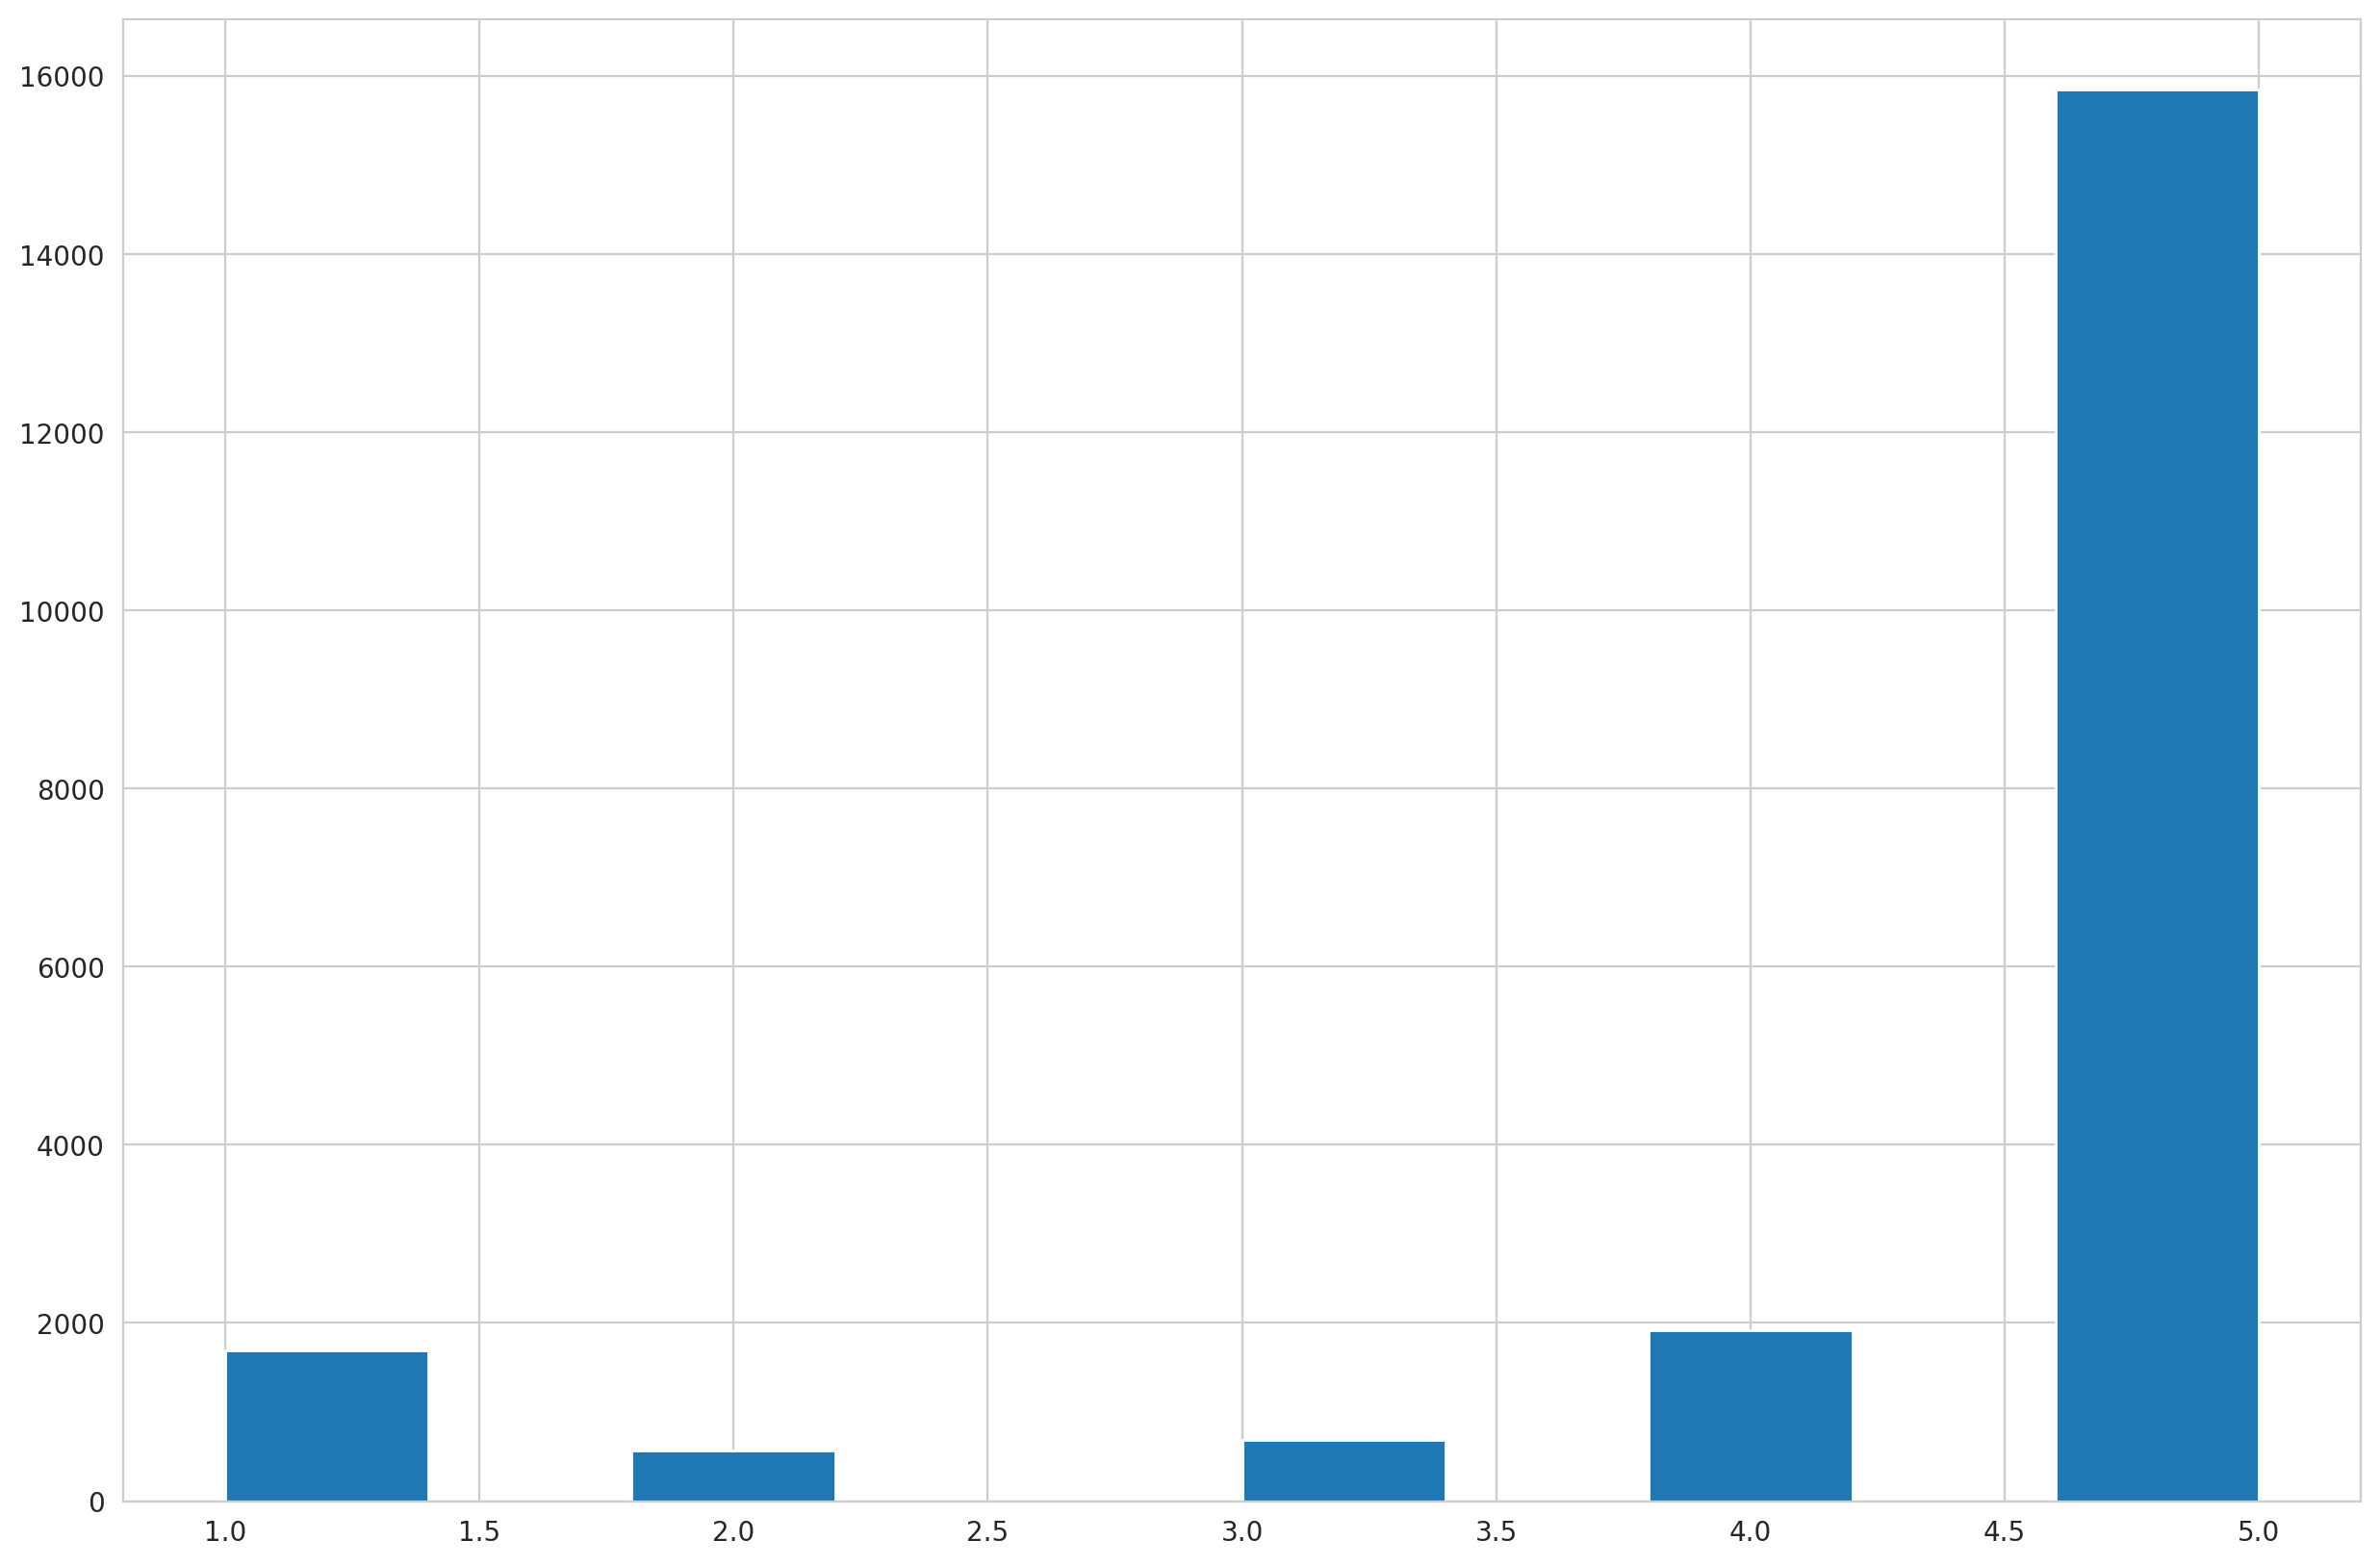

In [9]:
plt.hist(df_emirates['score'])
plt.show()

In [10]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.8 MB/s eta 0:00:00


In [11]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_emirates['sentiment_polarity'] = df_emirates['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_emirates['sentiment_subjective'] = df_emirates['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [12]:
df_emirates.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,Good app,5,0.700000,0.600000
1,Very user-friendly. It is a pleasure to use. Thank you very much.,5,0.230000,0.280000
2,"Easy to use, everything at the touch of a screen",5,0.433333,0.833333
3,user friendly and very accurate,5,0.447500,0.661667
4,easy to use.,5,0.433333,0.833333
...,...,...,...,...
20715,Nice work guys,5,0.600000,1.000000
20716,The Emirates App lets me manage my travel with Emirates without hassles!,5,0.000000,0.000000
20717,UI is fantastic.very user friendly and easy to access,5,0.404167,0.666667
20718,Fast and easy to use,5,0.316667,0.716667


## Lowercasing

In [13]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_emirates['content'] = df_emirates['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_emirates['content'][188])
print(df_emirates['content'][1])
print(df_emirates['content'][20100])

User friendly
Very user-friendly. It is a pleasure to use. Thank you very much.
This what I  encounter every time i open the app         "Unfortunately,the process android..process.acore has stopped"


In [14]:
#Lowercase all reviews to see the difference
df_emirates['content']= df_emirates['content'].apply(lambda x: x.lower())
print(df_emirates['content'][188])
print(df_emirates['content'][1])
print(df_emirates['content'][20100])

user friendly
very user-friendly. it is a pleasure to use. thank you very much.
this what i  encounter every time i open the app         "unfortunately,the process android..process.acore has stopped"


##Stopwords Removal
Indonesian Stopwords

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_emirates['wordCount'] = [len(review.split()) for review in df_emirates['content']]
df_emirates['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_emirates['content']]
df_emirates['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_emirates['content']]

In [17]:
df_emirates.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,good app,5,0.700000,0.600000,2,0,0
1,very user-friendly. it is a pleasure to use. thank you very much.,5,0.230000,0.280000,12,0,4
2,"easy to use, everything at the touch of a screen",5,0.433333,0.833333,10,0,1
3,user friendly and very accurate,5,0.447500,0.661667,5,0,0
4,easy to use.,5,0.433333,0.833333,3,0,1
...,...,...,...,...,...,...,...
20715,nice work guys,5,0.600000,1.000000,3,0,0
20716,the emirates app lets me manage my travel with emirates without hassles!,5,0.000000,0.000000,12,0,1
20717,ui is fantastic.very user friendly and easy to access,5,0.404167,0.666667,9,0,1
20718,fast and easy to use,5,0.316667,0.716667,5,0,0


In [18]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_emirates['sentiment_rating'] = df_emirates['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [19]:
df_emirates.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,good app,5,0.700000,0.600000,Positive
1,very user-friendly. it is a pleasure to use. thank you very much.,5,0.230000,0.280000,Positive
2,"easy to use, everything at the touch of a screen",5,0.433333,0.833333,Positive
3,user friendly and very accurate,5,0.447500,0.661667,Positive
4,easy to use.,5,0.433333,0.833333,Positive
...,...,...,...,...,...
20715,nice work guys,5,0.600000,1.000000,Positive
20716,the emirates app lets me manage my travel with emirates without hassles!,5,0.000000,0.000000,Positive
20717,ui is fantastic.very user friendly and easy to access,5,0.404167,0.666667,Positive
20718,fast and easy to use,5,0.316667,0.716667,Positive


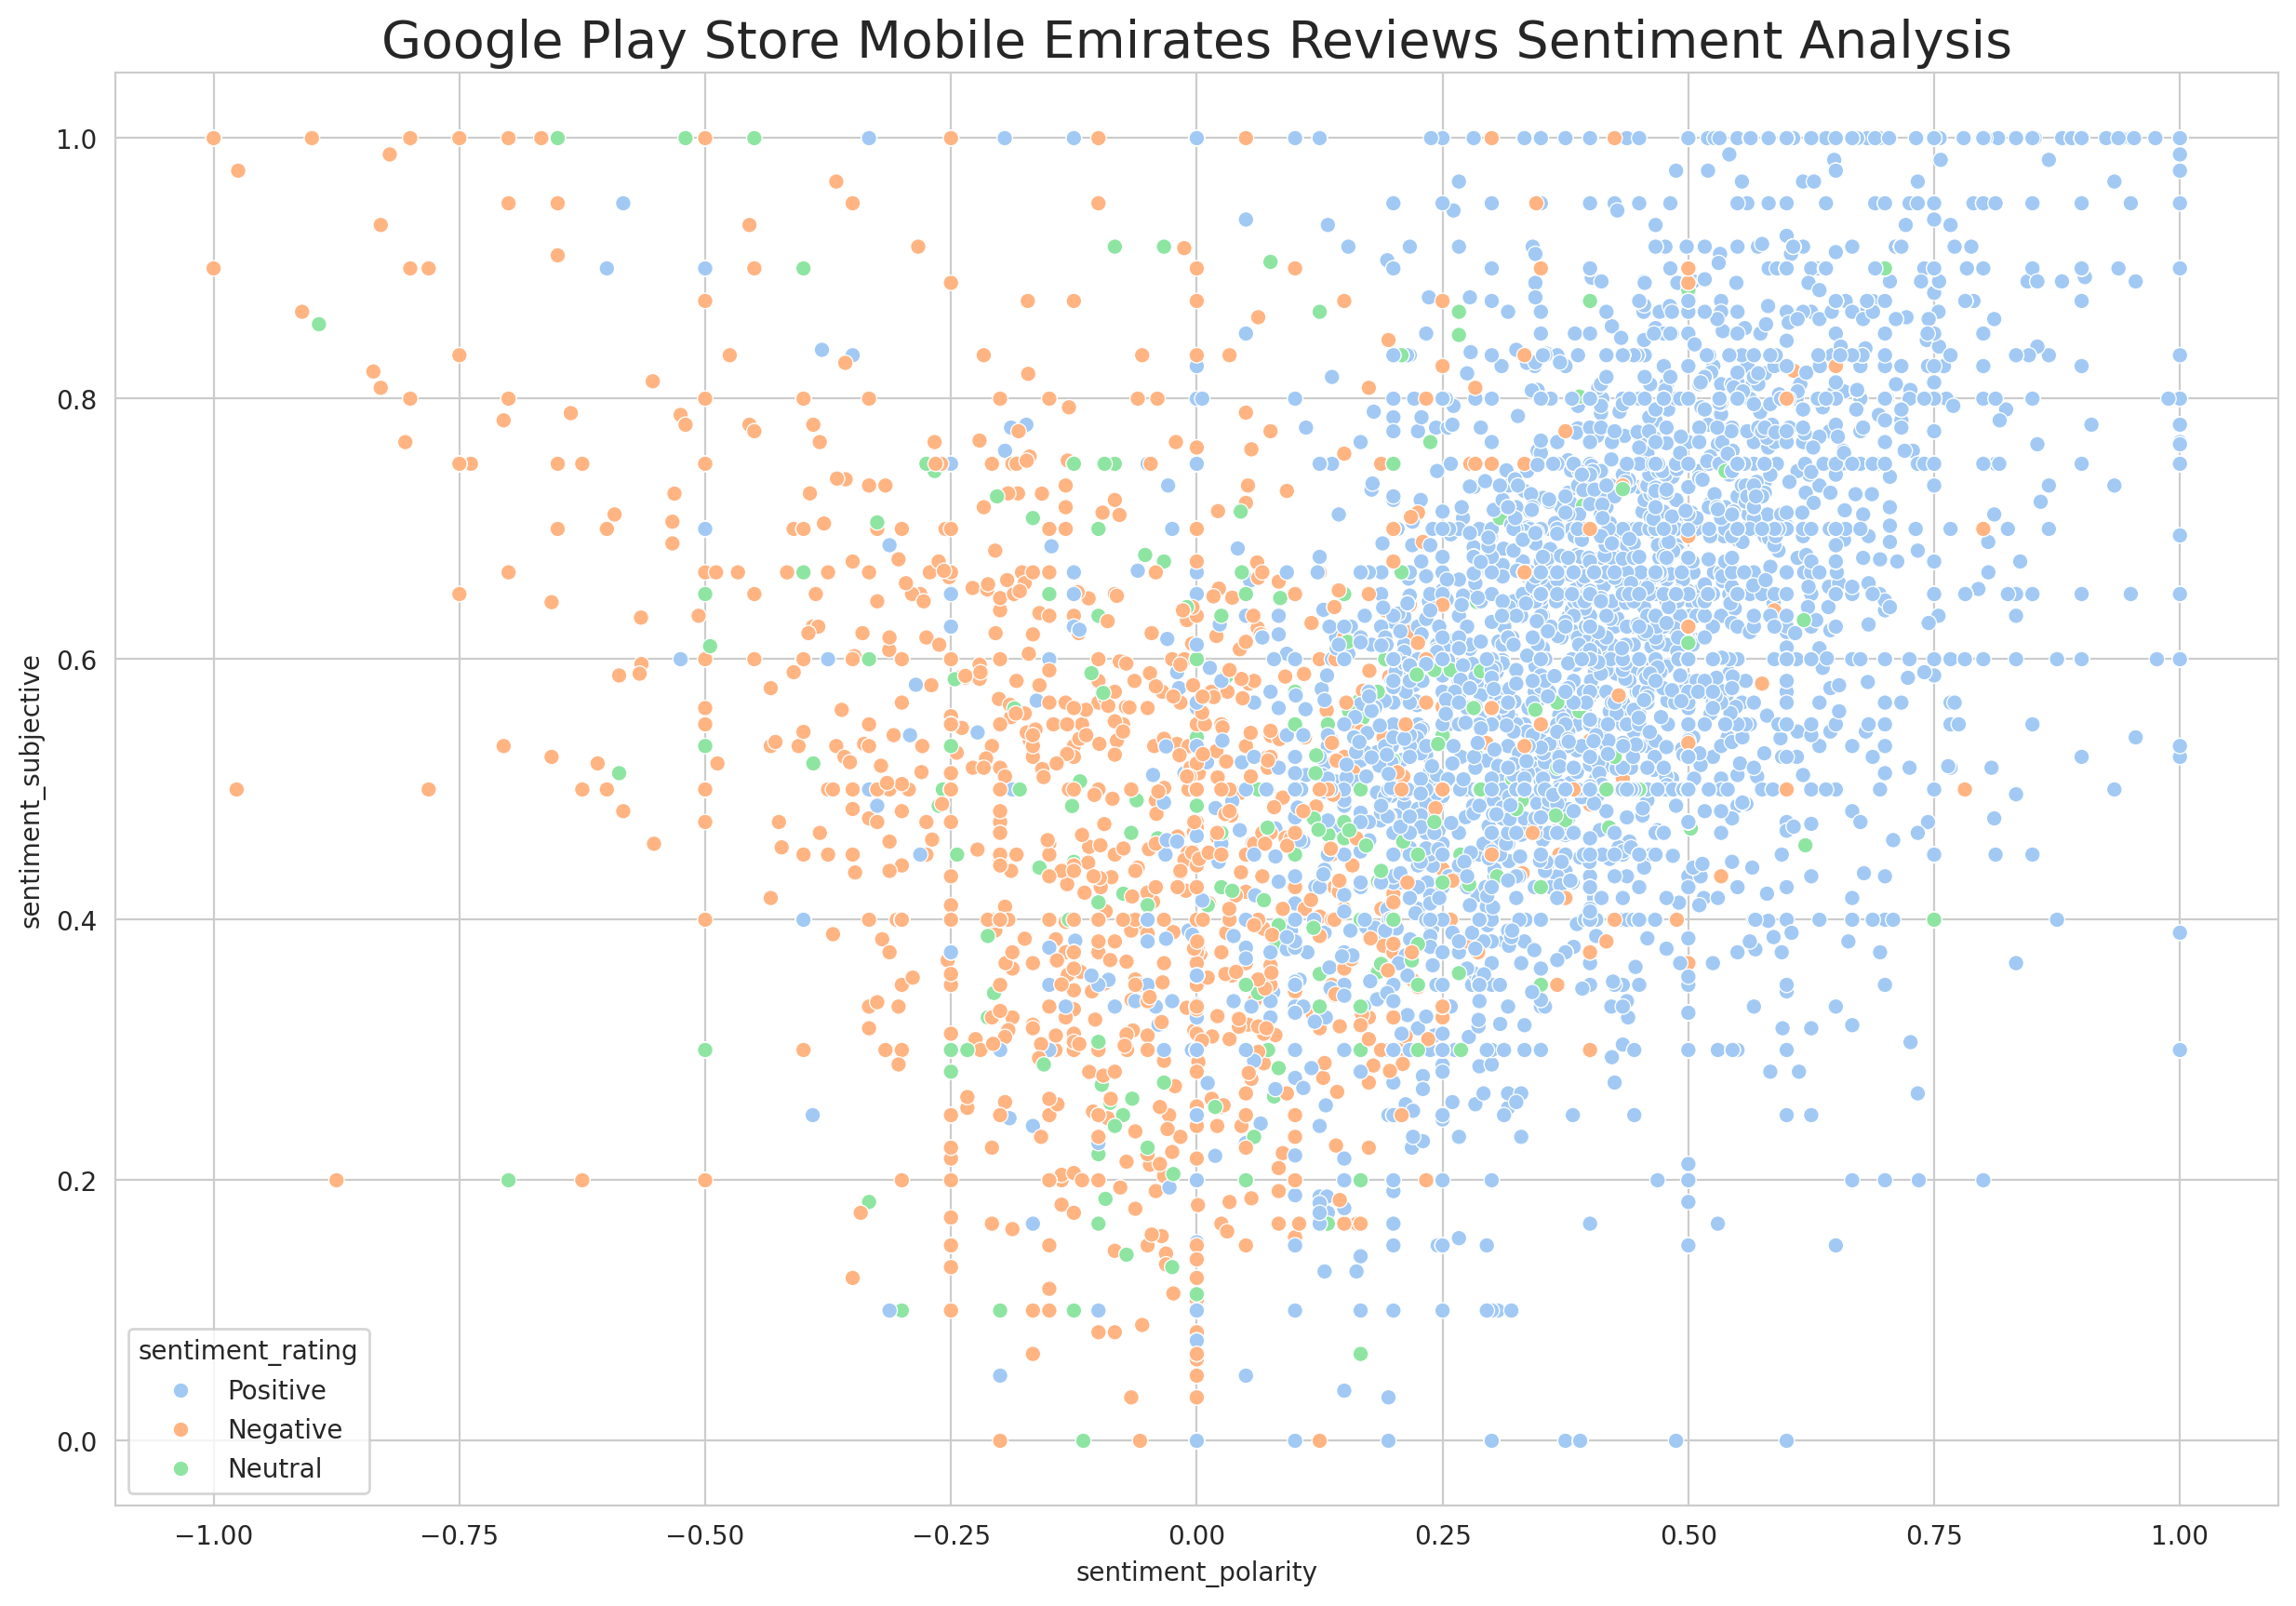

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_emirates['sentiment_polarity'], y=df_emirates['sentiment_subjective'],
                hue=df_emirates['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Mobile Emirates Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [21]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


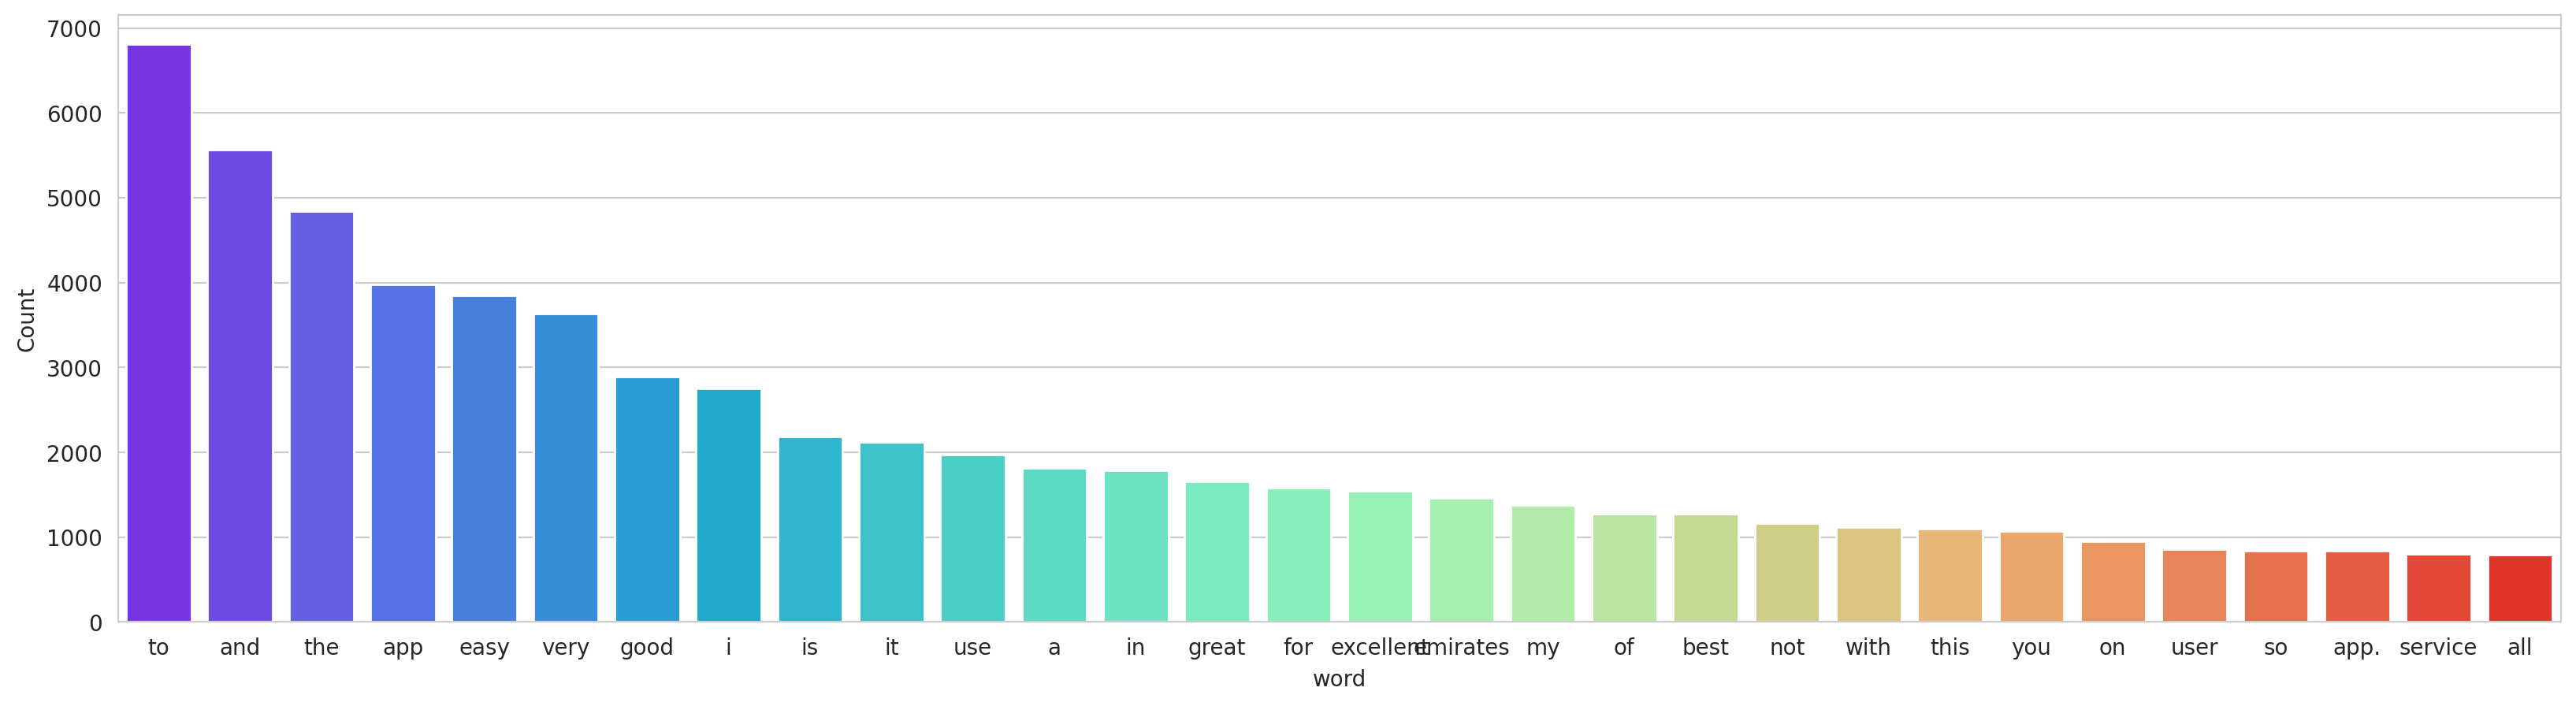

In [22]:
freq_words(df_emirates['content'])

In [23]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_emirates['content'] = df_emirates['content'].apply(lambda x: stopword_remover.remove(x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.9 MB/s eta 0:00:00


In [24]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_jknrev is your DataFrame and 'content' is the column
df_emirates['content'] = df_emirates['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
len(english_stopwords)

198

In [26]:
df_emirates.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,good app,5,0.700000,0.600000,Positive
1,user-friendly. pleasure use. thank much.,5,0.230000,0.280000,Positive
2,"easy use, everything touch screen",5,0.433333,0.833333,Positive
3,user friendly accurate,5,0.447500,0.661667,Positive
4,easy use.,5,0.433333,0.833333,Positive
...,...,...,...,...,...
20715,nice work guys,5,0.600000,1.000000,Positive
20716,emirates app lets manage travel emirates without hassles!,5,0.000000,0.000000,Positive
20717,ui fantastic.very user friendly easy access,5,0.404167,0.666667,Positive
20718,fast easy use,5,0.316667,0.716667,Positive


In [27]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


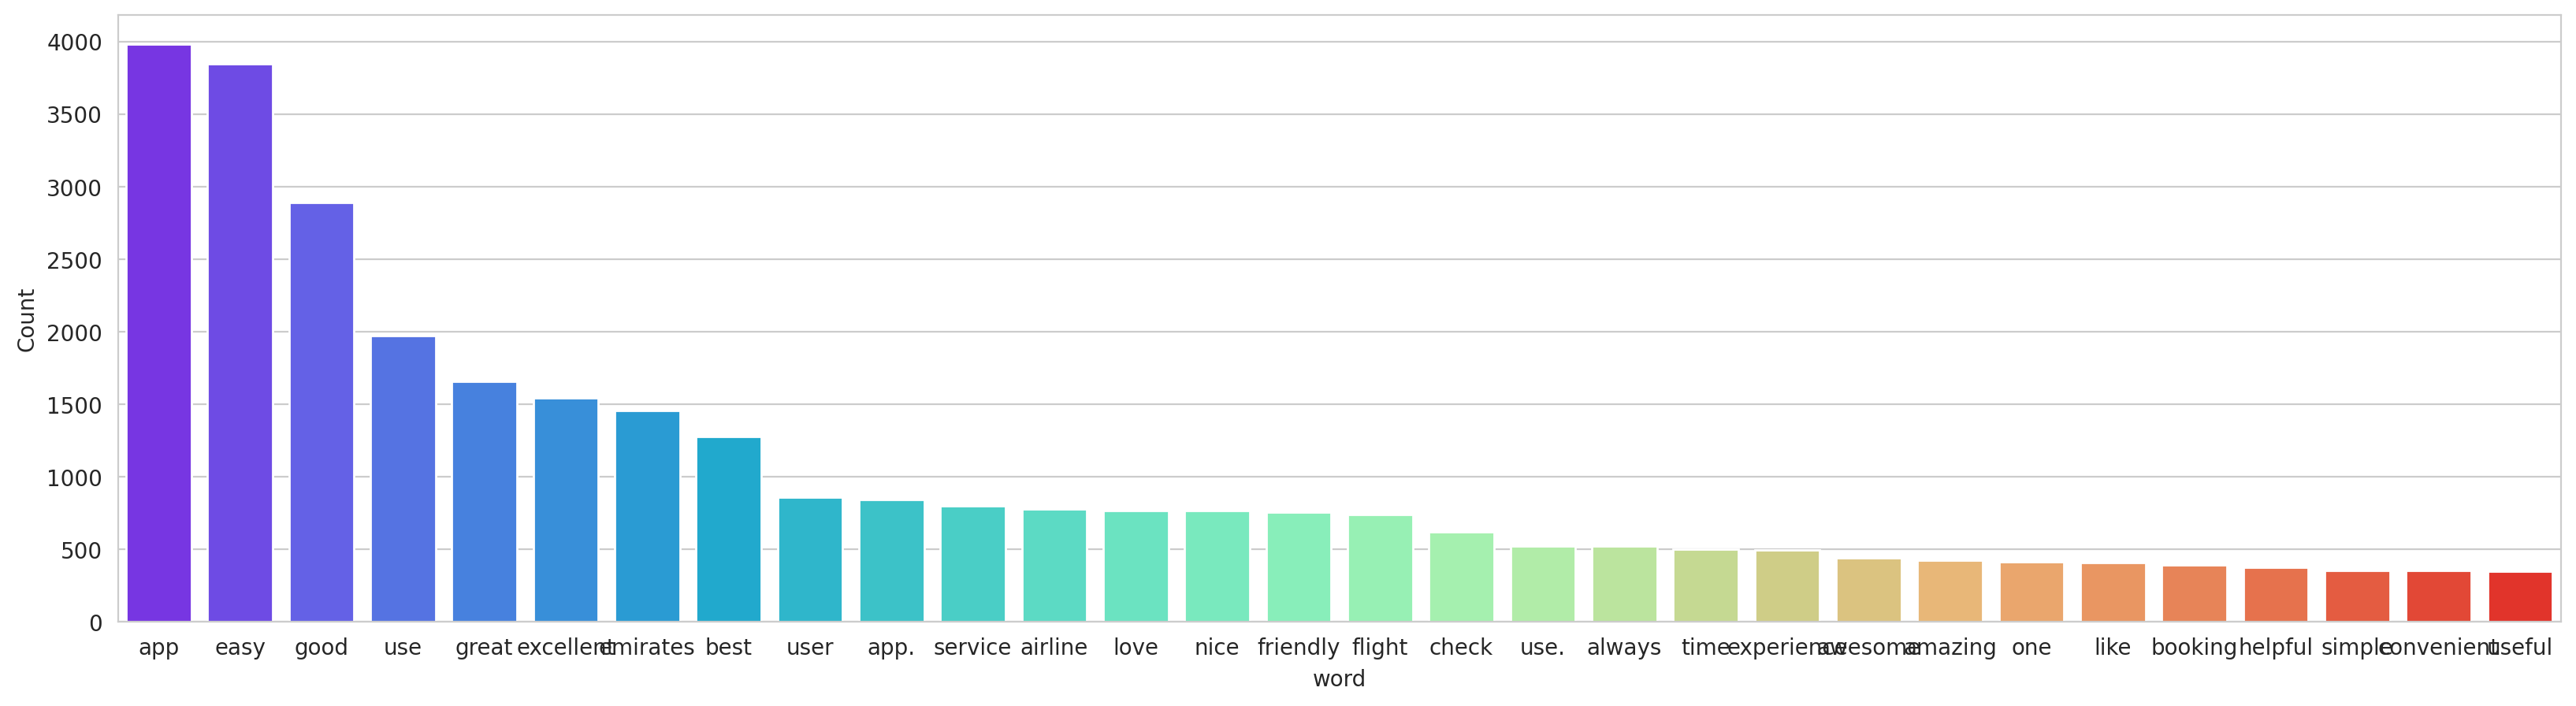

In [28]:
freq_words(df_emirates['content'])

In [29]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_emirates_stopwords['wordCount'] = [len(review.split()) for review in df_emirates_stopwords['content']]
df_emirates_stopwords['wordCount_after_stopwords'] = [len(review.split()) for review in df_emirates_stopwords['review_after_stopwords']]


NameError: name 'df_emirates_stopwords' is not defined

In [30]:
# ==== 0) Import & setup stopwords ====
import re, pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw_en = stopwords.words('english')
sw_id = stopwords.words('indonesian')
ALL_SW = set([*sw_en, *sw_id])

def normalize_text(s: str) -> str:
    s = (s or "").lower()
    # hapus tanda baca & karakter non huruf/angka, ganti jadi spasi
    s = re.sub(r"[^0-9a-zA-Z]+", " ", s)
    # rapikan spasi
    s = re.sub(r"\s+", " ", s).strip()
    return s

def remove_stopwords(s: str) -> str:
    toks = s.split()
    toks = [t for t in toks if t not in ALL_SW]
    return " ".join(toks)

# ==== 1) Load data (ganti path kalau perlu) ====
# Kalau file ada di panel kiri bernama "emirates_reviews.csv", pakai ini:
df_emirates = pd.read_csv("emirates_reviews.csv")

# ==== 2) Pastikan kolom teks ada ====
# Umumnya kolomnya bernama 'content'. Kalau beda (mis. 'review', 'text', 'comment'), mapping di sini:
possible_cols = ['content','review','text','comment','body','review_text']
text_col = next((c for c in possible_cols if c in df_emirates.columns), None)
assert text_col is not None, f"Tidak menemukan kolom teks. Kolom tersedia: {list(df_emirates.columns)}"

# Standarkan ke nama 'content'
if text_col != 'content':
    df_emirates = df_emirates.rename(columns={text_col:'content'})

# ==== 3) Buat kolom setelah stopwords ====
df_emirates['content_norm'] = df_emirates['content'].fillna('').map(normalize_text)
df_emirates['review_after_stopwords'] = df_emirates['content_norm'].map(remove_stopwords)

# ==== 4) (Opsional) salinan untuk analisis stopwords ====
df_emirates_stopwords = df_emirates.copy()

# ==== 5) Hitung jumlah kata sebelum & sesudah stopwords ====
df_emirates_stopwords['wordCount'] = df_emirates_stopwords['content_norm'].map(lambda x: len(x.split()))
df_emirates_stopwords['wordCount_after_stopwords'] = df_emirates_stopwords['review_after_stopwords'].map(lambda x: len(x.split()))

# Cek cepat
print("Kolom tersedia:", [c for c in df_emirates_stopwords.columns if 'wordCount' in c or 'review_after' in c or c=='content'])
df_emirates_stopwords[['content','review_after_stopwords','wordCount','wordCount_after_stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Kolom tersedia: ['content', 'review_after_stopwords', 'wordCount', 'wordCount_after_stopwords']


,content,review_after_stopwords,wordCount,wordCount_after_stopwords
0,Good app,good app,2,2
1,Very user-friendly. It is a pleasure to use. Thank you very much.,user friendly pleasure use thank much,13,6
2,"Easy to use, everything at the touch of a screen",easy use everything touch screen,10,5
3,user friendly and very accurate,user friendly accurate,5,3
4,easy to use.,easy use,3,2


In [31]:
import re, string
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 0) Mulai dari df_emirates (hasil reviews_all / reviews)
# df_emirates = pd.DataFrame(emirates_reviews)

# 1) Siapkan dataframe kerja
df_emirates_stopwords = df_emirates[['content']].copy()
df_emirates_stopwords['content'] = df_emirates_stopwords['content'].fillna('').astype(str)

# 2) Stopwords (bisa tambah domain-specific)
stops = set(ENGLISH_STOP_WORDS) | {
    'emirates', 'ek', 'flight', 'flights', 'airline', 'airlines',
    'app', 'apps', 'application'
}

# 3) Normalisasi teks
def normalize(text: str) -> str:
    text = text.lower()
    text = re.sub(r'http\S+|www\.\S+', ' ', text)          # hapus URL
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = re.sub(r'\d+', ' ', text)                       # hapus angka
    text = re.sub(r'\s+', ' ', text).strip()               # rapikan spasi
    return text

# 4) Hapus stopwords
def remove_stopwords(text: str) -> str:
    tokens = [w for w in text.split() if w not in stops]
    return ' '.join(tokens)

df_emirates_stopwords['normalized'] = df_emirates_stopwords['content'].map(normalize)
df_emirates_stopwords['review_after_stopwords'] = df_emirates_stopwords['normalized'].map(remove_stopwords)

# 5) Hitung jumlah kata sebelum & sesudah stopwords
df_emirates_stopwords['wordCount'] = df_emirates_stopwords['normalized'].str.split().str.len()
df_emirates_stopwords['wordCount_after_stopwords'] = df_emirates_stopwords['review_after_stopwords'].str.split().str.len()

# (opsional) simpan
df_emirates_stopwords.to_csv('emirates_reviews_stopwords.csv', index=False, encoding='utf-8')

# Cek cepat
print(df_emirates_stopwords[['wordCount','wordCount_after_stopwords']].describe())

          wordCount  wordCount_after_stopwords
count  20720.000000               20720.000000
mean       7.616844                   3.789431
std       11.470145                   5.037359
min        0.000000                   0.000000
25%        2.000000                   1.000000
50%        4.000000                   2.000000
75%        8.000000                   4.000000
max      276.000000                 116.000000
